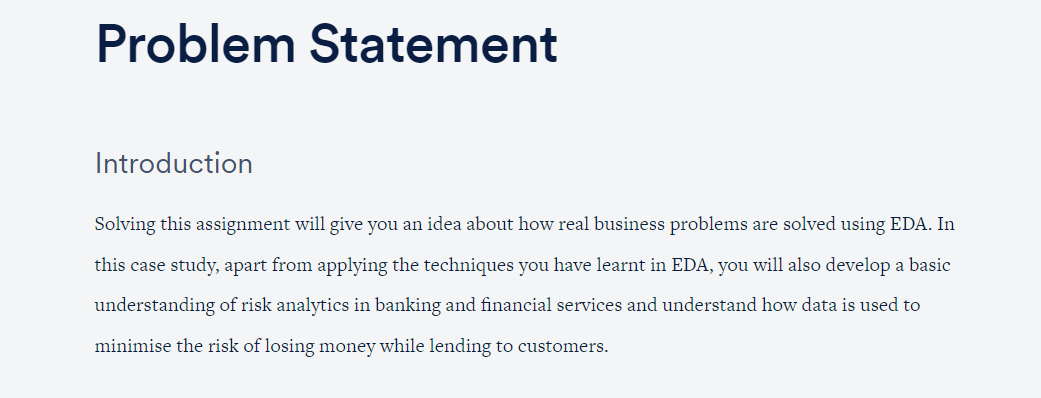
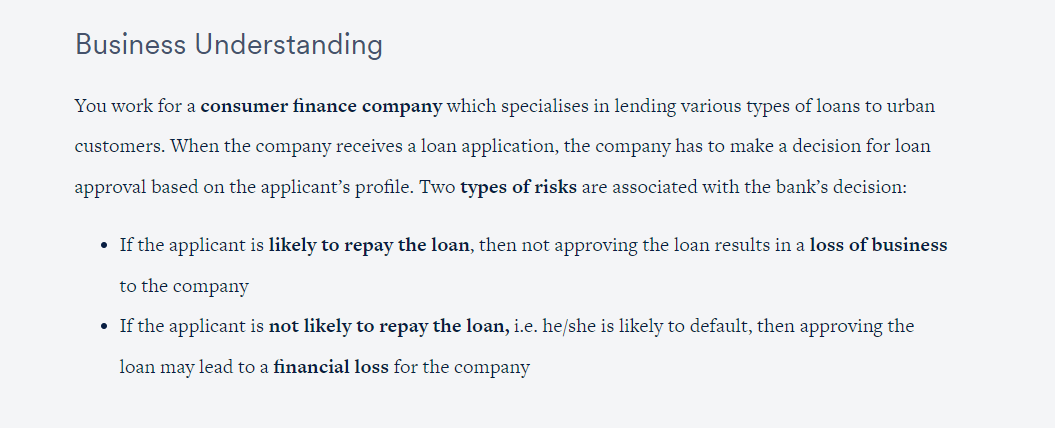
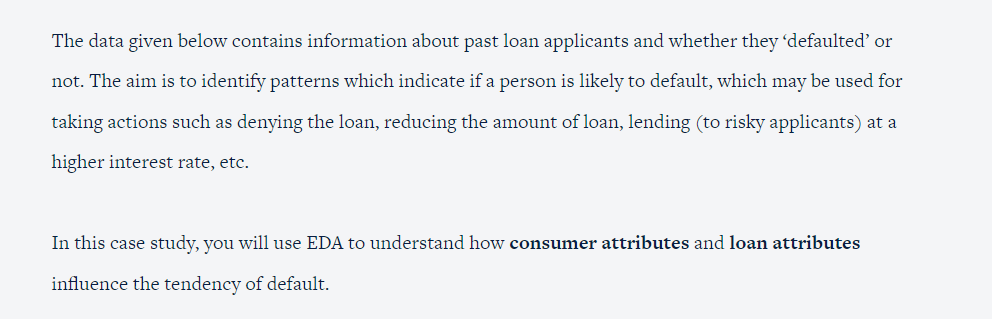
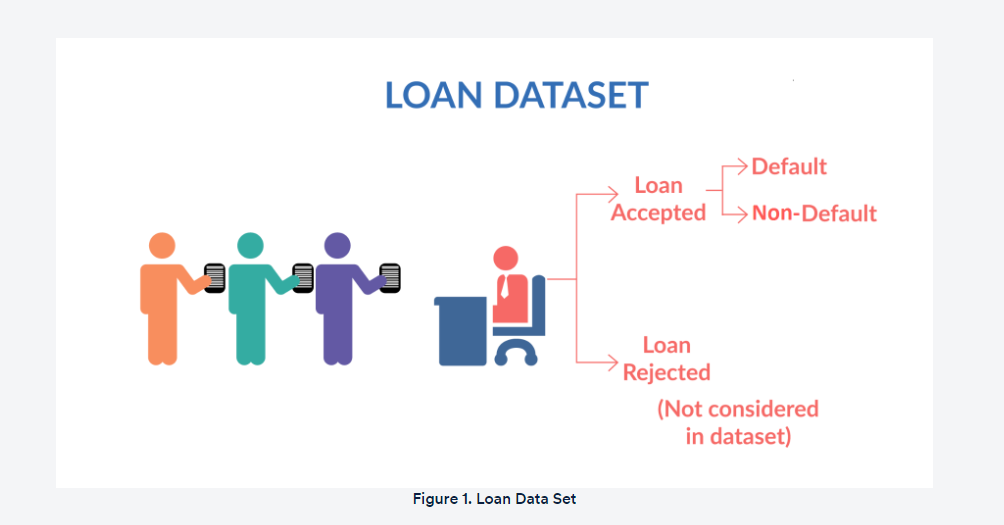
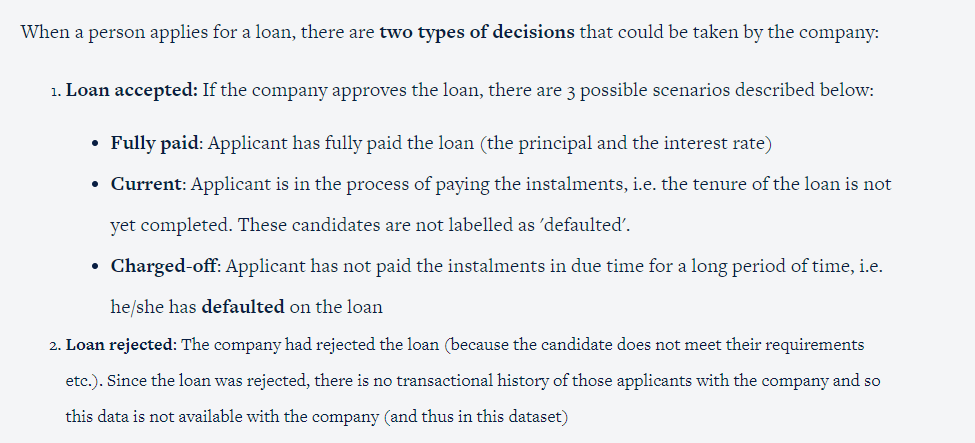

### Steps or Summary :
- Import Necessary Libraries
- Load the data and Data dictionary
- Data Understanding
- Missing Value Check
- Segmentation of Column
- Analysis:
    - Univariate Analysis (One Variable at a time)
    - Bivariate Analysis (Two Variable at a time)
    - Multivariate Analysis (More than two Variables at a time)

### Import Necessary Libraries


In [2]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt , seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [3]:
loan=pd.read_csv('loan.csv')

In [30]:
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')

In [4]:
loan.shape

(39717, 111)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [12]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [20]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Observation -  Looking at the description, there are a lot of missing or null values, so we have to perform Data Cleaning steps

### Missing Values Check

In [5]:
loan_original=loan.copy()

##### Let's create a copy of the original DataFrame before starting the cleaning operation. If we need to refer the original data at some point of analysis , then the "loan_original" can be checked. We'll use "loan" throughout for our analysis

In [6]:
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

bc_open_to_buy                100.00
acc_open_past_24mths          100.00
bc_util                       100.00
mo_sin_old_il_acct            100.00
mo_sin_old_rev_tl_op          100.00
                               ...  
collections_12_mths_ex_med      0.14
revol_util                      0.13
tax_liens                       0.10
title                           0.03
last_credit_pull_d              0.01
Length: 68, dtype: float64

#### Let's remove the columns with 100% missing values first as they'll be of no use

In [7]:
loan_missingvalues[loan_missingvalues==100.00]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [8]:
loan = loan.drop(columns=loan_missingvalues[loan_missingvalues==100.00].index)

In [12]:
### check and validate the shape again
loan.shape

(39717, 57)

In [9]:
###check null or missing values again
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

#### There are four columns where we have a lot of null or missing values ( more than 30%) . So we should also remove them in order to get exact picture

In [10]:
loan_missingvalues[loan_missingvalues>30.00]

desc                      32.59
mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
dtype: float64

In [11]:
loan = loan.drop(columns=loan_missingvalues[loan_missingvalues>30.00].index)

In [12]:
### check and validate the shape again
loan.shape

(39717, 53)

In [23]:
### check null or missing values again
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

#### Let us have a look at the above columns to analyze further. Lets check the count of unique values present in each column.

In [53]:
loan.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [55]:
loan[['pymnt_plan','initial_list_status','policy_code','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']].head()

,pymnt_plan,initial_list_status,policy_code,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
1,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
2,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
3,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
4,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0


#### Since the above columns are having same data for all the rows , so these will not help us in analysis and hence we can remove these columns

In [57]:
loan = loan.drop( ['pymnt_plan','initial_list_status','policy_code','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'] , axis=1 )

In [65]:
loan.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

In [63]:
#### Check id column
loan['id'].head()

0    1077501
1    1077430
2    1077175
3    1076863
4    1075358
Name: id, dtype: int64

In [70]:
data_dictionary[ data_dictionary['LoanStatNew']=='id' ]

,LoanStatNew,Description
27,id,A unique LC assigned ID for the loan listing.


In [64]:
#### Check url column
loan['url'].head()

0    https://lendingclub.com/browse/loanDetail.action?loan_id=1077501
1    https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
2    https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
3    https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
4    https://lendingclub.com/browse/loanDetail.action?loan_id=1075358
Name: url, dtype: object

In [71]:
data_dictionary[ data_dictionary['LoanStatNew']=='url' ]

,LoanStatNew,Description
111,url,URL for the LC page with listing data.


In [66]:
#### Check id column
loan['member_id'].head()

0    1296599
1    1314167
2    1313524
3    1277178
4    1311748
Name: member_id, dtype: int64

In [72]:
data_dictionary[ data_dictionary['LoanStatNew']=='member_id' ]

,LoanStatNew,Description
44,member_id,A unique LC assigned Id for the borrower member.


#### These three are having some non-relevant values , these are also not required for our analysis

In [68]:
loan=loan.drop(['id','url','member_id'],axis=1)

#### Let's impute missing values for emp_title column

In [48]:
pd.set_option('display.max_colwidth', None)
data_dictionary[ data_dictionary['LoanStatNew']=='emp_title' ].Description

20    The job title supplied by the Borrower when applying for the loan.*
Name: Description, dtype: object

In [50]:
loan['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object